## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# We can calculate the length of the dataset as below,
length=len(df)
length

294478

c. The number of unique users in the dataset.

In [4]:
uniq_id=df['user_id'].nunique()
uniq_id

290584

d. The proportion of users converted.

In [5]:
# Let's first get the number of converted users:
converted=df[df['converted']==1]
n_conv=len(converted)

# Then we can calculate the proportion among all records,
prop=n_conv/len(df)
prop*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# To obtain the results of this question, we need to sum the length of
# 2 datasets (treatment and Not new_page) and (Not treatment and new_page)

# Let's first obtain the dataset with group values of treatment
trt_df1= df[df['group']=='treatment']

# Next, for the treatment dataset, we need to obtain the landing_page values not equal to new_page
trt_old=trt_df1[trt_df1['landing_page']!='new_page']

# Now let's do the opposite, get the data excluding treatment and return the new_page values,
ntrt_df2= df[df['group']!='treatment']

# now filtering with new_page values,
ntrt_new=ntrt_df2[ntrt_df2['landing_page']=='new_page']

# Now let's sum the lenth of both datasets,
len(trt_old)+len(ntrt_new)

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


It seems that all fields have values, so there is no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Let's add the 2 conditions above in a new dataframe df_merged,

df_merged=pd.concat([trt_old,ntrt_new])
len(df_merged)

3893

In [9]:
# Now we should remove these raws from our dataset as they are not indicative,
df2=df.drop(index=df_merged.index, axis=0)
len(df2)

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
unq=df2['user_id'].nunique()
unq

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Let's find the duplications in 'user_id' column
dup=df2[df2['user_id'].duplicated()]['user_id'].item()
dup

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
# Let's find the rows with user_id = dup
df2[df2['user_id']==dup]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset= 'user_id' , inplace=True)

In [15]:
# Let's double check the length to ensure the dupliacted value was removed 
len(df2)

290584

In [16]:
# Let's keep a view of our dataset content to be able to answer the below questions,
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# The probability of converting here can be obtained by dividing the 
# length of converted raws by all dataframe length
conv=df2[df2['converted']==1]
proba=len(conv)/len(df2)
proba

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Let's first filter the dataframe by control group:
cont_grp=df2[df2['group']=='control']

# now to answer this question, we need to divide the length of control group
# records who converted by the length of all control group,

# Control group records who converted:
conv_contr=cont_grp[cont_grp['converted']==1]

# we will then divide them by all control group,
cont_prob=len(conv_contr)/len(cont_grp)
cont_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# We will follow the same steps as above but with obtaining the treatment group values,
trt_grp=df2[df2['group']=='treatment']

# now we can divide the length of treatment group records who converted by the length of all treatment group,

# treatment group records who converted:
conv_trt=trt_grp[trt_grp['converted']==1]

# we will then divide them by all treatment group,
trt_prob=len(conv_trt)/len(trt_grp)
trt_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# It can be calculated by the ratio of new page records to all records,

newp=df2[df2['landing_page']=='new_page']
prob_np=len(newp)/len(df2)
prob_np

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [21]:
# Let's calculate the change in probability of conversion between the 
# control group and the treatment group,

vr=trt_prob-cont_prob
vr

-0.0015782389853555567

I think there is no sufficient evidence to conclude that the new treatment page leads to more conversions, because the probability of conversion in the treatment group is even less than the probability of conversion in the control group. Additionally, we are not facing imbalance in our data as the probability of receiving the new page is around 50% so both groups are nearly equal in their presence in the dataframe, so we don't have a problem with sample size.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: **$p_{new}$** - **$p_{old}$**  <=0

H1: **$p_{new}$** - **$p_{old}$** >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [22]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


a. What is the **conversion rate** for $p_{new}$ under the null? 

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
# Since we assume that both p old and p new are equal under the null hypothesis, 
# then we can get both by calculating the conversion rate for all our dataset.
# which was already calculated before and saved under the name "proba"

proba

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
# Let's return the # of records for each group type,
new=df2[df2['group']=='treatment']
old=df2[df2['group']=='control']
new_len=len(new)
old_len=len(old)
print(new_len)
print(old_len)

145310
145274


In [25]:
# So answering Q(C):
new_len

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
old_len

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted=np.random.binomial(1, proba ,size=new_len)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted=np.random.binomial(1, proba ,size=old_len)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean()-old_page_converted.mean()

0.00061024033363774044

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
# let's create our simulations,
nw=np.random.binomial(new_len, proba , size=10000)/new_len
od=np.random.binomial(old_len, proba , size=10000)/old_len
p_diffs=nw-od
len(p_diffs)

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

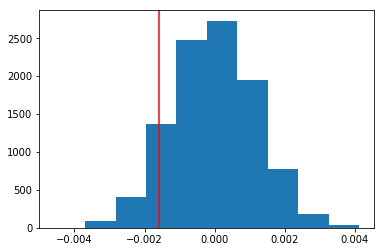

In [31]:
plt.hist(p_diffs)
plt.axvline(x=vr, c='r');

The plot looks like what i expected as i was expecting a normal distribution, and my statistic falls within the range of this distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# The difference observed in ab_data.csv was calculated before ans saved in a variable named 'vr'
(p_diffs > vr).mean()

0.90759999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This number represents the P-Value. And since it holds a very large number, this means that we don't have enough evidence to reject the null hypothesis. so we will accept the null hupothesis that the new page does not increase the conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = len(conv_contr)
convert_new = len(conv_trt)
n_old = old_len
n_new = new_len

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
from statsmodels.stats.proportion import proportions_ztest

In [35]:
stat, pval = proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
print(stat)
print(pval)

-1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The P-value (0.9) means that for the data we draw from the normal distribution under the null hypothesis, our statistic is greater than 90% of this data. Our statistic here is the difference between conversion rate for both the old and the new page. So it seems that the difference is very minor that the majority of the samples drawn is less than our statistic. So we don't have enough evidence to reject the null hypothesis. so this agrees with the previous outcome.

our Z-score is (-1.31092419842). If we set our type 1 error as 5%, our z-score will be 1.96. Receiving a z-score less than this value means these is not enough evidence to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [37]:
df['intercept']=1

In [38]:
# To make our columns full rank, i will name one of the 2 columns as 'dummy' and remove it.
df[['ab_page','dummy']]=pd.get_dummies(df['landing_page'])
df.drop('dummy', axis=1,inplace=True)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
lr=sm.Logit(df['converted'], df[['intercept', 'ab_page']])
results=lr.fit()


Optimization terminated successfully.
         Current function value: 0.366242
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-20 01:02 AIC:              215704.5581
No. Observations:   294478           BIC:              215725.7440
Df Model:           1                Log-Likelihood:   -1.0785e+05
Df Residuals:       294476           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9879    0.0080  -248.3052  0.0000  -2.0036  -1.9722
ab_page      -0.0155    0.0114    -1.3683  0.1712  -0.0378   0.0067
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.1712. It differes because the null hypothesis here did not specify the direction (difference being <=0). However, for the answer in part 2. Our null hypothesis assumes the difference is less than or equal to 0.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other factors seems to be a good idea because it gives us more understanding of both populations and might give indication of why a certain group might convert. I don't think there might be disadvantages to adding terms (away from memory capacity and computational cost of having larger data)

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [43]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [44]:
# Let's dummy the country column
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()


,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [45]:
# Then dummy the 'landing_page' column
df_new[['ab_page','dummy']]=pd.get_dummies(df_new['landing_page'])
df_new.drop('dummy', axis=1,inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1


In [46]:
# Finally, Let's add an intercept
df_new['intercept']=1

In [47]:
# Let's now run a resgression analysis to test the impact of countries on the conversion rate,

lr2=sm.Logit(df_new['converted'], df_new[['intercept', 'US','UK']])
results2=lr2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-20 01:02 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

It seems that adding the countries improved the model. the P-Value for both USA and UK is significant so they should be considered while predicting the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
# Let's add a column with the interaction between page and country
df_new['us_page'] = df_new['US'] * df_new['ab_page']
df_new['uk_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,ab_page,intercept,us_page,uk_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0,1


In [49]:
# Now let's run our regression model using this interaction,
count_lr=sm.Logit(df_new['converted'], df_new[['intercept', 'us_page', 'uk_page']])
resultsc=count_lr.fit()
resultsc.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-20 01:02 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
us_page      -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
uk_page       0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
==================================================================

"""

Adding the interaction here was important because it showed more details like reflecting that conversion for USA pages is more significant than UK pages.

Finally, i would like to conclude that the effect of the new page is very minor on the conversion rate, so the final decision is to keep working with the old page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0